In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# root dir 설정
## Colab 환경에서는 /content

In [2]:
root_dir = '/content'

# 학습 모델 로딩
## Google Drive 마운트 및 h5 파일 복사

In [3]:
from google.colab import drive   

drive.mount('/content/gdrive/')  

Mounted at /content/gdrive/


In [4]:
# 파일 다운로드
import os

pre_trained_model_path = '/content/gdrive/My Drive/Colab Notebooks/datasets/h5'

import shutil

try:
    shutil.copy(os.path.join(pre_trained_model_path, 'MyCropClassification_MobileNet_Colab.zip'), root_dir)

except Exception as err:
    print(str(err))

In [5]:
import os
import shutil

# 작업 디렉토리는 MyFlowerClassification_Xception_Colab

if os.path.exists( os.path.join(root_dir, 'MyCropClassification_MobileNet_Colab') ):

    shutil.rmtree( os.path.join(root_dir, 'MyCropClassification_MobileNet_Colab') )
    print(os.path.join(root_dir, 'MyCropClassification_MobileNet_Colab') + ' is deleted !!')

In [6]:
# 압축파일 풀기

import zipfile

with zipfile.ZipFile(os.path.join(root_dir, 'MyCropClassification_MobileNet_Colab.zip'), 'r') as target_file:

    target_file.extractall(os.path.join(root_dir, 'MyCropClassification_MobileNet_Colab')) 

# 학습 모델 로딩

In [7]:
try:
    model_path = 'MyCropClassification_MobileNet_Colab/MyCropClassification_MobileNet_Colab.h5'
    model = tf.keras.models.load_model(os.path.join(root_dir, model_path))
    print('pre-trained model is loaded !!!')
    
except Exception as err:
    print(str(err))

pre-trained model is loaded !!!


# 실시간으로 디렉토리를 만들면 I/O 작업으로 인해 시간 소모가 많음. 이에 필요한 디렉토리는 미리 만들어둔다

In [8]:
import os

# 결과를 저장할 상위 디렉토리 pred_result 생성
pred_root_dir = os.path.join(root_dir, 'pred_result')

if not os.path.exists(pred_root_dir):
    
    os.mkdir(pred_root_dir)
    print(pred_root_dir + 'is created !!')

/content/pred_resultis created !!


In [9]:
# 정답 디렉토리 + unknown 디렉토리 생성

# dir_names = ['daffodil', 'daisy', 'dandelion', 'forget_me_not', 'roses', 'sunflowers', 'tulips', 'unknown']
dir_names = ['01.daikon', '02.carrot', '03.cabbage', '04.garlic', '06.broccoli', '12.potato', '13.buckwheat', '14.bean', '15.millet']

for i in range(len(dir_names)):

    label_dir =  pred_root_dir + '/' + str(dir_names[i]).strip()

    if not os.path.exists(label_dir):
        os.mkdir(label_dir)
        print(label_dir + ' is created !!')

/content/pred_result/01.daikon is created !!
/content/pred_result/02.carrot is created !!
/content/pred_result/03.cabbage is created !!
/content/pred_result/04.garlic is created !!
/content/pred_result/06.broccoli is created !!
/content/pred_result/12.potato is created !!
/content/pred_result/13.buckwheat is created !!
/content/pred_result/14.bean is created !!
/content/pred_result/15.millet is created !!


# 테스트 이미지 읽기

In [10]:
import zipfile

with zipfile.ZipFile('./my_crop_photo_dir.zip', 'r') as target_file:

    target_file.extractall('my_crop_photo_dir')

    print('test image is extracted into my_crop_photo_dir !!!')

test image is extracted into my_crop_photo_dir !!!


In [11]:
import cv2
import glob
import os

src_img_list = []  # 원본 이미지 저장 list
dst_img_list = []


img_file_list = glob.glob(os.path.join(root_dir, 'my_crop_photo_dir/*'))


print(img_file_list)

# 테스트 이미지 읽기

for i in range(len(img_file_list)):

    src_img = cv2.imread(img_file_list[i], cv2.IMREAD_COLOR)  # 원본 이미지
    dst_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)  # 채널순서 변경된 이미지
    dst_img = cv2.resize(dst_img, dsize=(224,224))  # 학습데이터 크기에 맞게 resize
    dst_img = dst_img / 255.0  # 정규화

    print('%d-th image shape => '% (i+1), src_img.shape, dst_img.shape )

    src_img_list.append(src_img)  # src 이미지 저장
    dst_img_list.append(dst_img)  # dst 이미지 저장

['/content/my_crop_photo_dir/20210924_09789324_30_03_0069.jpg', '/content/my_crop_photo_dir/20211004_13126902_30_04_0056.jpg', '/content/my_crop_photo_dir/20211020_09696214_30_02_0049.jpg', '/content/my_crop_photo_dir/20211009_09598659_30_01_0002.jpg', '/content/my_crop_photo_dir/20211009_09598659_30_01_0018.jpg', '/content/my_crop_photo_dir/20211020_09696214_30_02_0048.jpg', '/content/my_crop_photo_dir/20210924_09789324_40_03_0052.jpg']
1-th image shape =>  (512, 512, 3) (224, 224, 3)
2-th image shape =>  (512, 512, 3) (224, 224, 3)
3-th image shape =>  (512, 512, 3) (224, 224, 3)
4-th image shape =>  (512, 512, 3) (224, 224, 3)
5-th image shape =>  (512, 512, 3) (224, 224, 3)
6-th image shape =>  (512, 512, 3) (224, 224, 3)
7-th image shape =>  (512, 512, 3) (224, 224, 3)


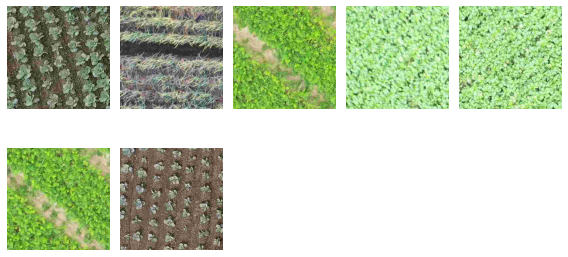

In [12]:
# matplotlib 이용해서 target 이미지 출력

plt.figure(figsize=(8,8))

for i in range(len(dst_img_list)):
    plt.subplot(4,5,i+1)  # 4 행 5열
    plt.axis('off')
    plt.imshow(dst_img_list[i])

plt.tight_layout()
plt.show()

# prediction 실행

In [13]:
# predict() 입력을 위해 4차원으로 shape 확장

test_image_array = np.array(dst_img_list)

print(test_image_array.shape)

(7, 224, 224, 3)


In [14]:
# 이미지 예측을 위한 class name 정의

# class_names = ['daffodil', 'daisy', 'dandelion', 'forget_me_not', 'roses', 'sunflowers', 'tulips']
class_names = ['01.daikon', '02.carrot', '03.cabbage', '04.garlic', '06.broccoli', '12.potato', '13.buckwheat', '14.bean', '15.millet']

pred = model.predict(test_image_array)

print(pred.shape)

(7, 9)


In [15]:
for index in range(len(pred)):

    class_index = np.argmax(pred[index])
    print('prediction => ',class_names[class_index], pred[index].max())

prediction =>  03.cabbage 0.9999993
prediction =>  04.garlic 0.99979836
prediction =>  02.carrot 1.0
prediction =>  01.daikon 1.0
prediction =>  01.daikon 0.9999951
prediction =>  02.carrot 1.0
prediction =>  03.cabbage 0.99997497


In [16]:
# 상위 3개 예측 값
top3 = 3

for index in range(len(pred)):

    sorted_index = pred[index].argsort()  # 오름차순으로 인덱스 정렬
    sorted_index = sorted_index[::-1]     # 내림차순으로 인덱스 정렬

    print('=====================================')
    print(sorted_index)
    
    for j in range(top3):
        pred_val = pred[index, sorted_index[j]]
        class_index = sorted_index[j]
        print('prediction => ',class_names[class_index], pred_val)
        

[2 4 7 5 8 6 1 3 0]
prediction =>  03.cabbage 0.9999993
prediction =>  06.broccoli 3.6792298e-07
prediction =>  14.bean 2.758045e-07
[3 8 6 2 1 0 7 5 4]
prediction =>  04.garlic 0.99979836
prediction =>  15.millet 0.00010375903
prediction =>  13.buckwheat 8.6733606e-05
[1 7 4 3 5 0 2 6 8]
prediction =>  02.carrot 1.0
prediction =>  14.bean 1.0330068e-09
prediction =>  06.broccoli 3.307184e-10
[0 1 6 8 7 2 4 5 3]
prediction =>  01.daikon 1.0
prediction =>  02.carrot 4.482953e-08
prediction =>  13.buckwheat 2.4249863e-08
[0 5 6 8 1 7 2 4 3]
prediction =>  01.daikon 0.9999951
prediction =>  12.potato 4.9349605e-06
prediction =>  13.buckwheat 5.1007202e-08
[1 4 7 3 0 8 5 2 6]
prediction =>  02.carrot 1.0
prediction =>  06.broccoli 3.225835e-12
prediction =>  14.bean 2.914877e-12
[2 4 7 1 5 6 8 0 3]
prediction =>  03.cabbage 0.99997497
prediction =>  06.broccoli 2.4107416e-05
prediction =>  14.bean 5.350876e-07


# 90% 이상의 확률로 예측한 이미지만 원본으로 정답디렉토리에 저장하고, 90% 미만은 unknown 디렉토리에 저장함. 구글 포토 mini 서비스 구현 

In [17]:
import shutil

# class_names = ['daffodil', 'daisy', 'dandelion', 'forget_me_not', 'roses', 'sunflowers', 'tulips']
class_names = ['01.daikon', '02.carrot', '03.cabbage', '04.garlic', '06.broccoli', '12.potato', '13.buckwheat', '14.bean', '15.millet']

for index in range(len(pred)):

    class_index = np.argmax(pred[index])
    print('prediction => ',class_names[class_index], pred[index].max())

    if pred[index].max() >= 0.9:    # 90 % 이상 확률이면

        target_dir = os.path.join(pred_root_dir, class_names[class_index].strip())
        shutil.copy(img_file_list[index], target_dir)
        file_name = img_file_list[index].split('/')[1].strip()
        print('%s is copied into %s' % (file_name, target_dir))
        print('-------------------------------------------------------------------')

    else:    # 90 % 미만 확률
        target_dir = os.path.join(pred_root_dir, 'unknown')
        shutil.copy(img_file_list[index], target_dir)
        file_name = img_file_list[index].split('/')[1].strip()  
        print('%s is copied into %s' % (file_name, target_dir))
        print('-------------------------------------------------------------------')

prediction =>  03.cabbage 0.9999993
content is copied into /content/pred_result/03.cabbage
-------------------------------------------------------------------
prediction =>  04.garlic 0.99979836
content is copied into /content/pred_result/04.garlic
-------------------------------------------------------------------
prediction =>  02.carrot 1.0
content is copied into /content/pred_result/02.carrot
-------------------------------------------------------------------
prediction =>  01.daikon 1.0
content is copied into /content/pred_result/01.daikon
-------------------------------------------------------------------
prediction =>  01.daikon 0.9999951
content is copied into /content/pred_result/01.daikon
-------------------------------------------------------------------
prediction =>  02.carrot 1.0
content is copied into /content/pred_result/02.carrot
-------------------------------------------------------------------
prediction =>  03.cabbage 0.99997497
content is copied into /content/pred